In [10]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [11]:
# load train and test dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()

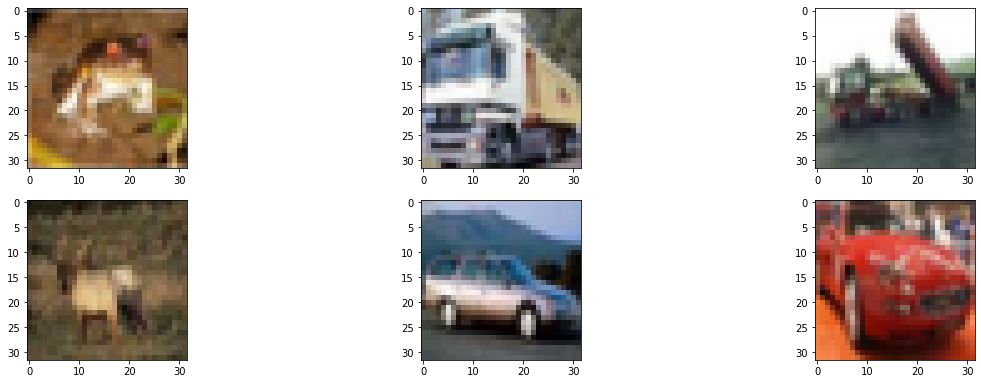

In [12]:
n=6
pyplot.figure(figsize=(20,10))
for i in range(n):
  pyplot.subplot(330+1+i)
  pyplot.imshow(trainX[i])
pyplot.show()

In [13]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [14]:
# scale pixels
	
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

In [15]:
# define cnn model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       

In [20]:
#Compile model
opt = Adam(lr=0.001,decay=2e-4)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)

In [26]:
# fit model
steps = int(trainX.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=15, validation_data=(testX, testY), verbose=1)


Epoch 1/15
781/781 [==============================] - 427s 547ms/step - loss: 1.4317 - accuracy: 0.4920 - val_loss: 1.1938 - val_accuracy: 0.5700
Epoch 2/15
781/781 [==============================] - 413s 529ms/step - loss: 1.1101 - accuracy: 0.6063 - val_loss: 0.9397 - val_accuracy: 0.6695
Epoch 3/15
781/781 [==============================] - 418s 536ms/step - loss: 0.9543 - accuracy: 0.6633 - val_loss: 0.9368 - val_accuracy: 0.6785
Epoch 4/15
781/781 [==============================] - 425s 544ms/step - loss: 0.8650 - accuracy: 0.6987 - val_loss: 0.7082 - val_accuracy: 0.7566
Epoch 5/15
781/781 [==============================] - 414s 530ms/step - loss: 0.8018 - accuracy: 0.7198 - val_loss: 0.7325 - val_accuracy: 0.7396
Epoch 6/15
781/781 [==============================] - 407s 521ms/step - loss: 0.7511 - accuracy: 0.7400 - val_loss: 0.6068 - val_accuracy: 0.7888
Epoch 7/15
781/781 [==============================] - 415s 532ms/step - loss: 0.7080 - accuracy: 0.7553 - val_loss: 0.6400 -

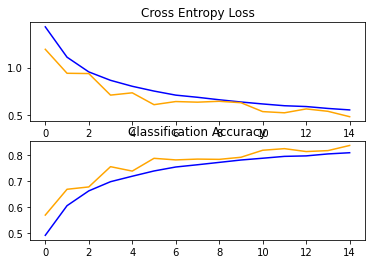

In [27]:
# plot diagnostic learning curves

# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')

# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

# save plot to file
filename = sys.argv[0].split('/')[-1]
pyplot.savefig(filename + '_plot.png')
pyplot.show()
pyplot.close()

In [28]:
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 21s 66ms/step - loss: 0.4793 - accuracy: 0.8384
> 83.840


In [29]:
model.save("model_cifar_10.h5")

In [35]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}

img = load_img('sample_image-1.png', target_size=(32, 32))
print('sample_image-1.png')

# convert to array
img = img_to_array(img)
# reshape into a single sample with 3 channels
img = img.reshape(1, 32, 32, 3)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0

model = load_model('model_cifar_10.h5')
# predict the class
pred = model.predict_classes(img)

print(pred[0],results[pred[0]])

sample_image-1.png
4 deer
